## Facebook Ad Campaign Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

### Loading Facebook Ad Data

In [2]:
fb = pd.read_csv('data.csv')

In [3]:
fb.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [4]:
fb.tail()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.0,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.0,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.0,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.0,NaN,NaN
1142,1314415,17/08/2017,17/08/2017,45-49,F,114,116,118,513161,114,165.609999,5,2.0,NaN,NaN


In [6]:
fb.shape

(1143, 15)

In [8]:
fb.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

In [9]:
fb.count

<bound method DataFrame.count of         ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
0      708746      17/08/2017    17/08/2017         916         103916  30-34   
1      708749      17/08/2017    17/08/2017         916         103917  30-34   
2      708771      17/08/2017    17/08/2017         916         103920  30-34   
3      708815      30/08/2017    30/08/2017         916         103928  30-34   
4      708818      17/08/2017    17/08/2017         916         103928  30-34   
...       ...             ...           ...         ...            ...    ...   
1138  1314410      19/08/2017    19/08/2017       45-49              F    109   
1139  1314411      19/08/2017    19/08/2017       45-49              F    110   
1140  1314412      19/08/2017    19/08/2017       45-49              F    111   
1141  1314414      17/08/2017    17/08/2017       45-49              F    113   
1142  1314415      17/08/2017    17/08/2017       45-49              F    11

In [10]:
fb.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [11]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [12]:
fb.min()

ad_id                      708746
reporting_start        17/08/2017
reporting_end          17/08/2017
campaign_id                  1178
fb_campaign_id             103916
age                            10
gender                         10
interest1                       2
interest2                       3
interest3                       0
impressions                   0.0
clicks                          0
spent                         0.0
total_conversion              0.0
approved_conversion           0.0
dtype: object

In [13]:
fb.max()

ad_id                     1314415
reporting_start        30/08/2017
reporting_end          30/08/2017
campaign_id                   936
fb_campaign_id                  M
age                             7
gender                          M
interest1                     120
interest2                 2286228
interest3                     421
impressions             3052003.0
clicks                        340
spent                  639.949998
total_conversion             60.0
approved_conversion          21.0
dtype: object

In [14]:
fb.std()

<ipython-input-14-95482753038b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fb.std()


ad_id                  193992.814738
interest1                  27.560263
interest2              267050.550639
interest3                  48.987248
impressions            206702.299206
clicks                     27.347899
spent                      48.418711
total_conversion            4.062201
approved_conversion         1.656445
dtype: float64

### Missing Values

In [15]:
fb.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [16]:
fb.mean()

<ipython-input-16-788f21b5a21f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fb.mean()


ad_id                  987261.130359
interest1                  33.884514
interest2              118060.622922
interest3                  42.474191
impressions             68724.998241
clicks                     11.629921
spent                      17.597760
total_conversion            2.161629
approved_conversion         0.768725
dtype: float64

In [18]:
fb.median()

<ipython-input-18-6d3c712dd8e4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fb.median()


ad_id                  1121185.00
interest1                   26.00
interest2                   33.00
interest3                   27.00
impressions               3142.00
clicks                       2.00
spent                        1.53
total_conversion             1.00
approved_conversion          0.00
dtype: float64

### Visualizing DataSet by Seaborn Library

<AxesSubplot:ylabel='Count'>

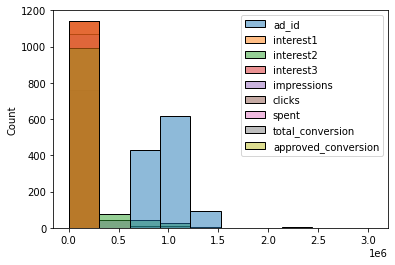

In [20]:
sns.histplot(fb,bins=10)

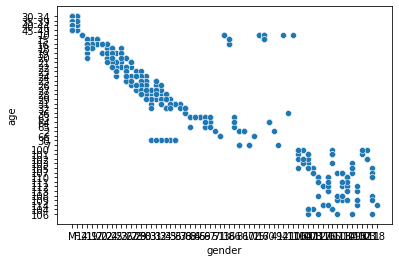

In [24]:
sns.scatterplot(x='gender',y='age',data=fb)
plt.show()

### Correlation

In [27]:
fb1=fb.corr()
fb1

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
ad_id,1.000000,0.484023,0.414783,0.250067,0.163745,0.189332,0.154072,0.337959,0.302495
interest1,0.484023,1.000000,0.246366,0.211240,-0.134762,-0.104568,-0.134160,-0.077155,-0.057761
interest2,0.414783,0.246366,1.000000,0.905184,-0.146632,-0.060082,-0.138460,-0.075735,-0.054047
interest3,0.250067,0.211240,0.905184,1.000000,-0.109010,-0.031484,-0.099641,-0.073855,-0.055626
impressions,0.163745,-0.134762,-0.146632,-0.109010,1.000000,0.965629,0.980918,0.885863,0.761856
clicks,0.189332,-0.104568,-0.060082,-0.031484,0.965629,1.000000,0.992596,0.808487,0.673458
spent,0.154072,-0.134160,-0.138460,-0.099641,0.980918,0.992596,1.000000,0.825692,0.687713
total_conversion,0.337959,-0.077155,-0.075735,-0.073855,0.885863,0.808487,0.825692,1.000000,0.881020
approved_conversion,0.302495,-0.057761,-0.054047,-0.055626,0.761856,0.673458,0.687713,0.881020,1.000000


### Heatmap

<AxesSubplot:>

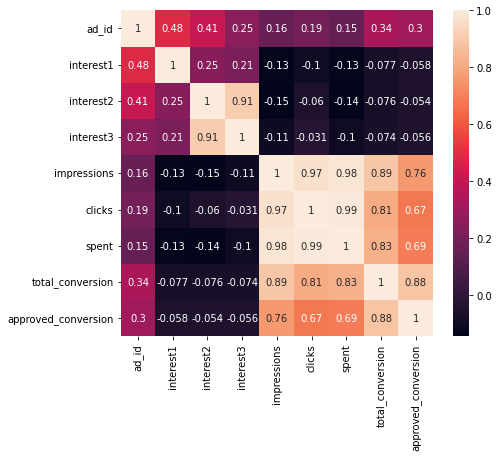

In [30]:
fig , ax = plt.subplots(figsize=(7,6))
sns.heatmap(fb1,annot = True)

### Lineplot

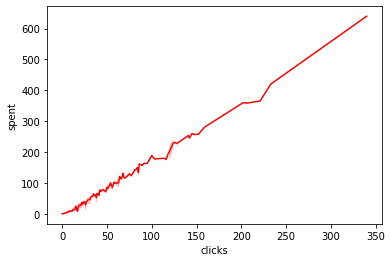

In [36]:
sns.lineplot(x='clicks',y='spent',data=fb,color='red')
plt.show()

### Visualization of whole DataSet by Seaborn(sns)

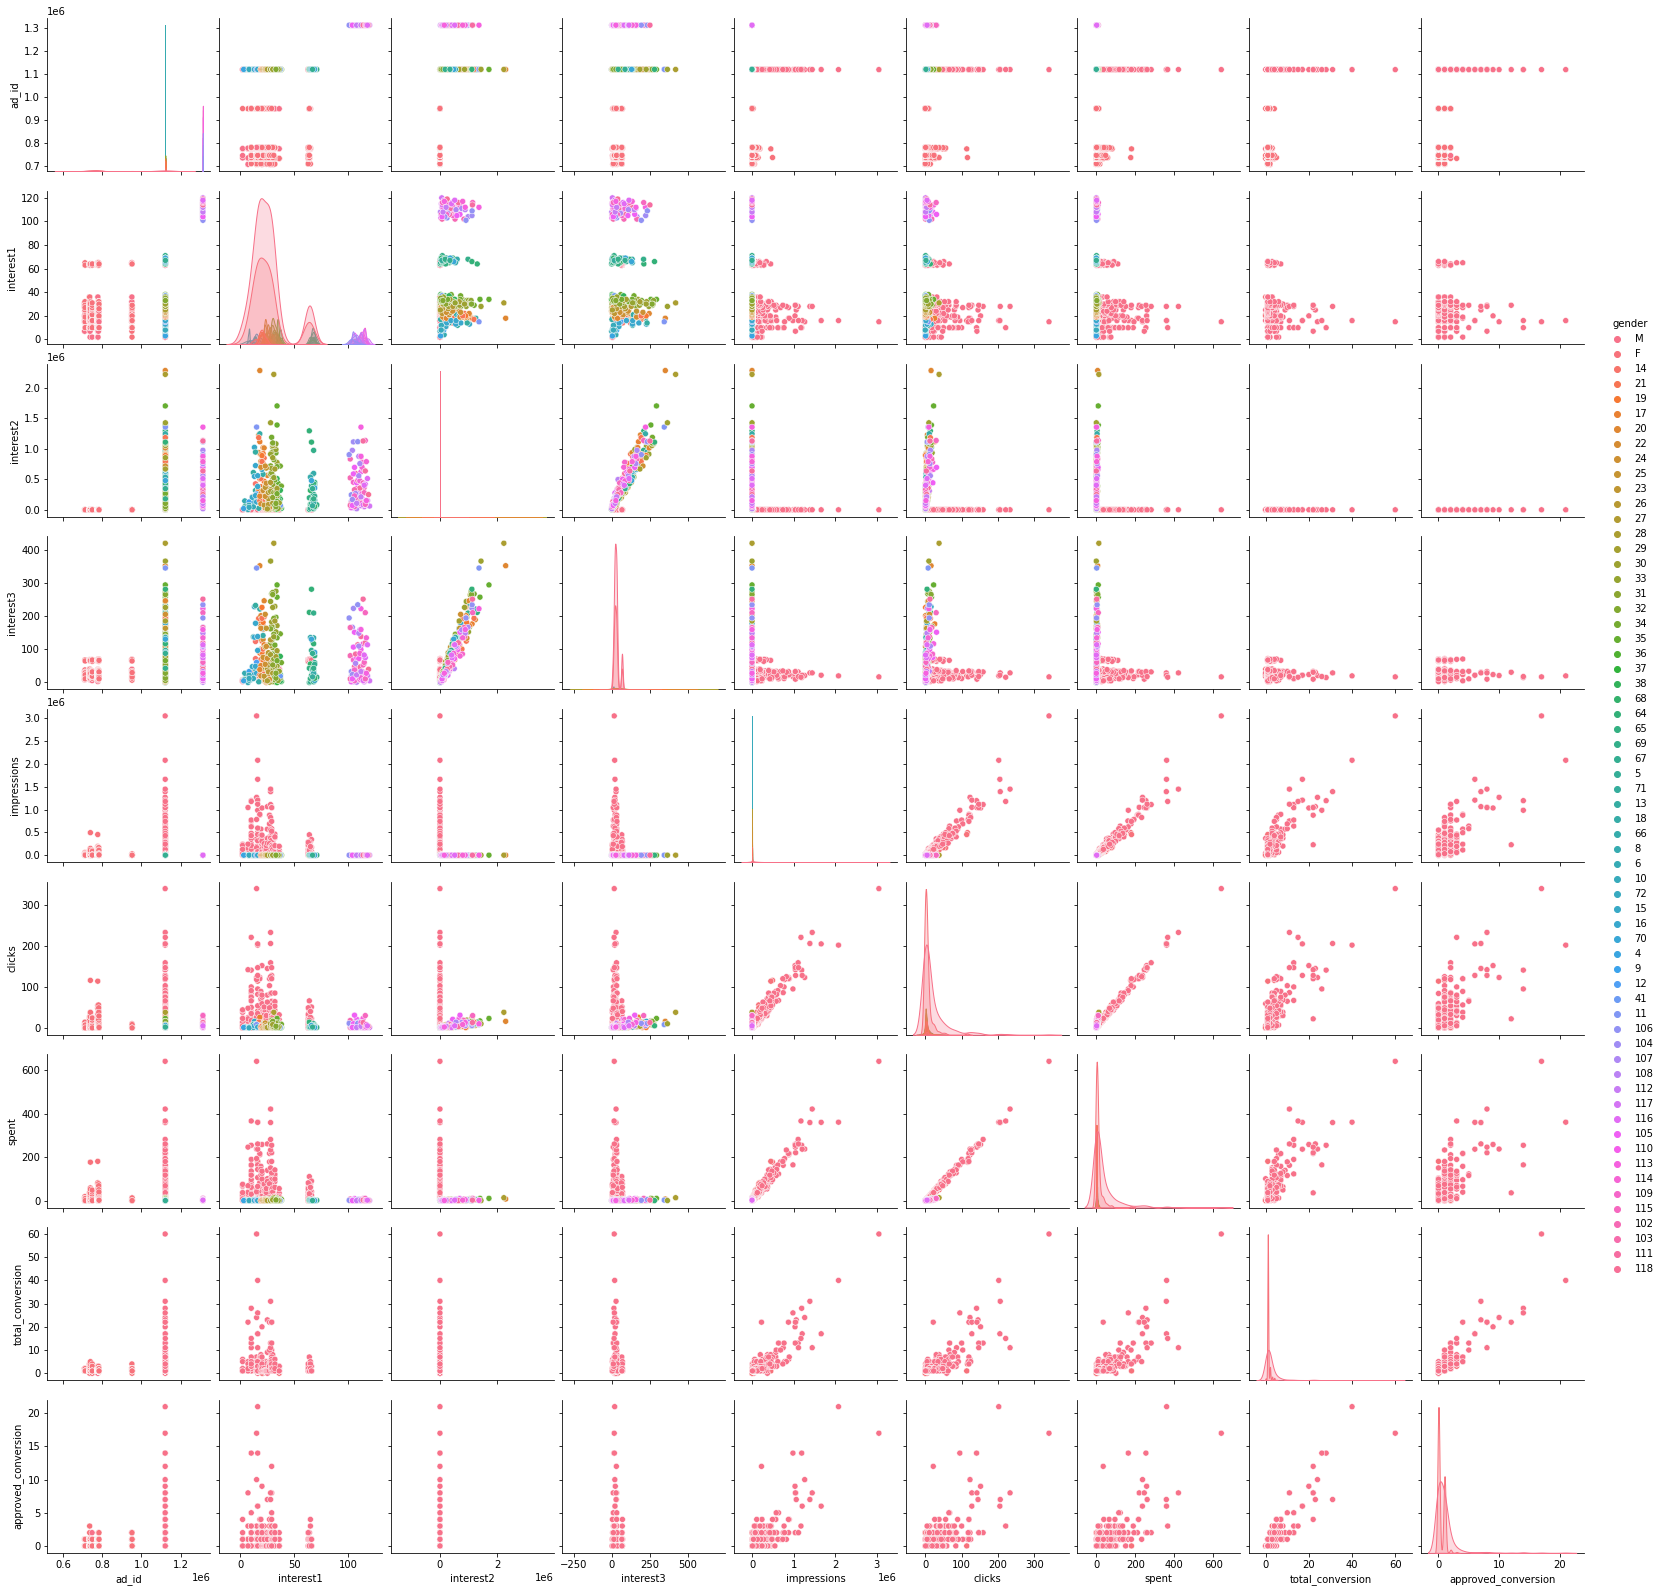

In [32]:
sns.pairplot(fb,hue='gender')
plt.show()

### Genders for the Ad Campaign

In [33]:
fb.gender.value_counts()

M      486
F      275
31      19
30      15
24      14
      ... 
72       1
4        1
9        1
12       1
118      1
Name: gender, Length: 63, dtype: int64

### Maximum & Minimum spent on Ad Campaign

In [37]:
fb[fb['spent'] ==fb['spent'].max()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
525,1121100,29/08/2017,29/08/2017,1178,144532,30-34,M,15,20,17,3052003.0,340,639.949998,60.0,17.0


In [38]:
fb[fb['spent'] ==fb['spent'].min()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.0,1.0,0.0
5,708820,17/08/2017,17/08/2017,916,103929,30-34,M,29,30,30,1915.000000,0,0.0,1.0,1.0
10,708979,30/08/2017,30/08/2017,916,103955,30-34,M,31,37,34,1224.000000,0,0.0,1.0,0.0
11,709023,29/08/2017,29/08/2017,916,103962,30-34,M,7,8,8,735.000000,0,0.0,1.0,0.0
12,709038,29/08/2017,29/08/2017,916,103965,30-34,M,16,20,22,5117.000000,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1314397,20/08/2017,20/08/2017,40-44,F,111,116,115,402975,83,120.899998,1,0.0,NaN,NaN
1132,1314404,19/08/2017,19/08/2017,45-49,F,103,105,104,71982,11,16.340001,1,0.0,NaN,NaN
1135,1314407,19/08/2017,19/08/2017,45-49,F,106,112,108,107100,23,33.710001,1,0.0,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.0,NaN,NaN


### Maximum & Minimum clicks on Ad Campaign

In [39]:
fb[fb['clicks'] ==fb['clicks'].max()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
525,1121100,29/08/2017,29/08/2017,1178,144532,30-34,M,15,20,17,3052003.0,340,639.949998,60.0,17.0


In [41]:
fb[fb['clicks'] ==fb['clicks'].min()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.00,0,0.0,1.0,0.0
5,708820,17/08/2017,17/08/2017,916,103929,30-34,M,29,30,30,1915.00,0,0.0,1.0,1.0
10,708979,30/08/2017,30/08/2017,916,103955,30-34,M,31,37,34,1224.00,0,0.0,1.0,0.0
11,709023,29/08/2017,29/08/2017,916,103962,30-34,M,7,8,8,735.00,0,0.0,1.0,0.0
12,709038,29/08/2017,29/08/2017,916,103965,30-34,M,16,20,22,5117.00,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1121375,29/08/2017,29/08/2017,1178,144586,35-39,M,29,31,35,9921.00,0,0.0,1.0,0.0
719,1121477,21/08/2017,21/08/2017,1178,144603,40-44,M,21,27,22,7073.00,0,0.0,1.0,0.0
866,1121820,22/08/2017,22/08/2017,30-34,F,28,29,32,11471,1,1.57,0,0.0,NaN,NaN
981,1122146,26/08/2017,26/08/2017,40-44,F,32,38,37,319501,79,111.65,0,0.0,NaN,NaN


### Aprroved Conversion by each campaign ID

In [42]:
approved=(fb.groupby(['campaign_id'])).approved_conversion.sum()
approved

campaign_id
1178     378.0
30-34      0.0
35-39      0.0
40-44      0.0
45-49      0.0
916       24.0
936      183.0
Name: approved_conversion, dtype: float64

### Total Conversion by each campaign ID

In [44]:
total=(fb.groupby(['campaign_id'])).total_conversion.sum()
total

campaign_id
1178     1050.0
30-34       0.0
35-39       0.0
40-44       0.0
45-49       0.0
916        58.0
936       537.0
Name: total_conversion, dtype: float64

### Percentage of Ads Approved

In [45]:
Percantage = (approved/total)*100
Percantage

campaign_id
1178     36.000000
30-34          NaN
35-39          NaN
40-44          NaN
45-49          NaN
916      41.379310
936      34.078212
dtype: float64

### Total number of Impression Received

In [46]:
imp=(fb.groupby(['campaign_id'])).impressions.sum()
imp

campaign_id
1178     6.990248e+07
30-34    7.559180e+03
35-39    5.966910e+03
40-44    7.252100e+03
45-49    1.830680e+04
916      4.829250e+05
936      8.128187e+06
Name: impressions, dtype: float64

### Total number of clicks Received

In [47]:
clicks=(fb.groupby(['campaign_id'])).clicks.sum()
clicks

campaign_id
1178     9577
30-34     541
35-39     269
40-44     288
45-49     521
916       113
936      1984
Name: clicks, dtype: int64

### SPLITTING DATASET INTO TRAINING AND TEST SET

In [49]:
X=fb[['total_conversion','approved_conversion']]
y=fb[['spent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### ENCODING VARIABLES

In [50]:
lab_encoder = LabelEncoder()
fb['spent'] = lab_encoder.fit_transform(fb['spent'])
fb.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,47,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,73,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,31,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,35,1.0,1.0
